# Motivation for Tree based methods 

After doing EDA on the data it was realised that the data
- Contained a lot of categorical features
- Right-skewed. 
- Requires scaling, normalization and one-hot encoding for linear methods to work

Therefore, it was decided that one should go for tree based methods as they tend to deal with categorical data better and are more robust to outliers/skewness. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.ensemble import GradientBoostingRegressor as gb 
from sklearn.ensemble import AdaBoostRegressor as ad 
from sklearn.ensemble import ExtraTreesRegressor as et
from sklearn.tree import DecisionTreeRegressor as dt 
from xgboost import XGBRegressor as xg
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
import warnings; warnings.simplefilter('ignore')
import lightgbm as lgb
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor as cat
%matplotlib inline

In [39]:
train_data = pd.read_csv(r"C:\Users\Lenovo\Desktop\Advanced Regression\train.csv")
test_data = pd.read_csv(r"C:\Users\Lenovo\Desktop\Advanced Regression\test.csv")

In [40]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

It is observed that all the categorical features have dtype as 'object' and can be used to seperate them from numerical features

In [ ]:
sns.distplot(train_data)

# **Seperating Categorical Features**

Changing Numeric features that are actually categorical 

In [44]:
#MSSubClass=The building class
train_data['MSSubClass'] = train_data['MSSubClass'].astype(str)
test_data['MSSubClass'] = test_data['MSSubClass'].astype(str)

#Changing OverallCond into a categorical variable
train_data['OverallCond'] = train_data['OverallCond'].astype(str)
test_data['OverallCond'] = test_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
train_data['YrSold'] = train_data['YrSold'].astype(str)
train_data['MoSold'] = train_data['MoSold'].astype(str)
test_data['YrSold'] = test_data['YrSold'].astype(str)
test_data['MoSold'] = test_data['MoSold'].astype(str)
train_data['YearBuilt'] = train_data['YearBuilt'].astype(str)
test_data['YearBuilt'] = test_data['YearBuilt'].astype(str)

In [45]:
categorical_features= train_data.columns[train_data.dtypes =='object'].astype(list)
categorical_features

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [46]:
category_train= train_data[(categorical_features)]
category_test = test_data[(categorical_features)]

In [47]:
numeric_features = train_data.columns[train_data.dtypes != 'object']
numeric_test = test_data[numeric_features.drop('SalePrice')]
numeric_train = train_data[numeric_features.drop('SalePrice')]


# Handling Categorical Missing Values 

Text(0.5, 1.0, 'Missing Values')

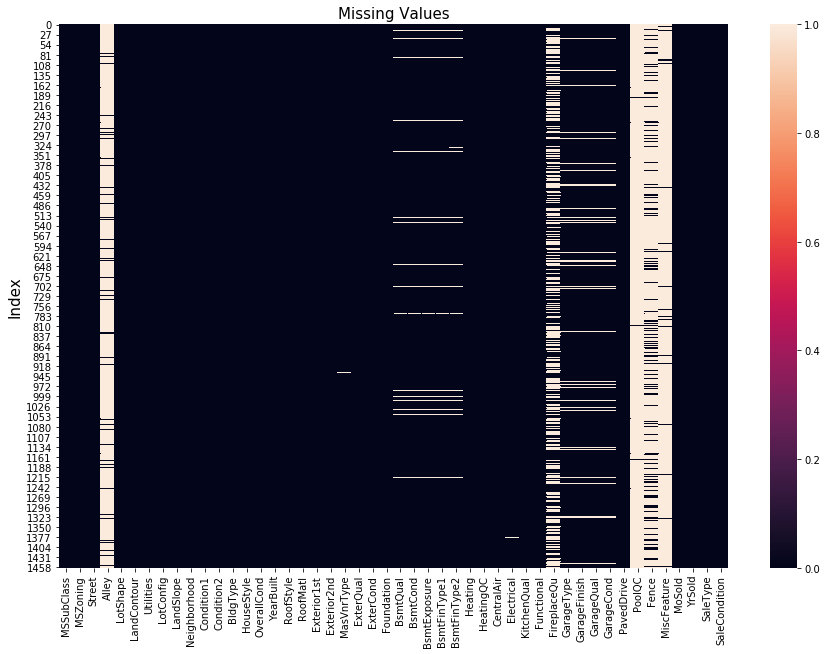

In [48]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(category_train.isnull())
plt.ylabel('Index', fontsize=15)
plt.title('Missing Values', fontsize=15)

In [49]:
data = (category_train.isnull().mean().round(4) * 100).sort_values(ascending= False)
Missing_Data = pd.DataFrame({'Missing Ratio' : data})
Missing_Data.head(20)

,Missing Ratio
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
GarageFinish,5.55
GarageCond,5.55
GarageQual,5.55
GarageType,5.55
BsmtFinType2,2.60


It's safe to assume that having a Null value in Categorical Variables correspond to 'None' or absense of that category for a particular house. Example, PoolQc, Misc feature columns have most null values because most houses dont have a pool or a misc feature other than those listed

# **Imputing Missing Values**

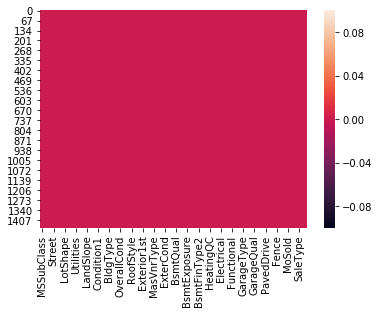

In [50]:
category_train.fillna('None' ,inplace =True)
category_test.fillna('None', inplace= True)
sns.heatmap(category_train.isnull())

# Feature Engineering (Categorical)

## Label Encoding 

In [51]:
for c in categorical_features:
    category_train[c] = category_train[c].factorize()[0]
for d in categorical_features:
    category_test[d]= category_test[d].factorize()[0]

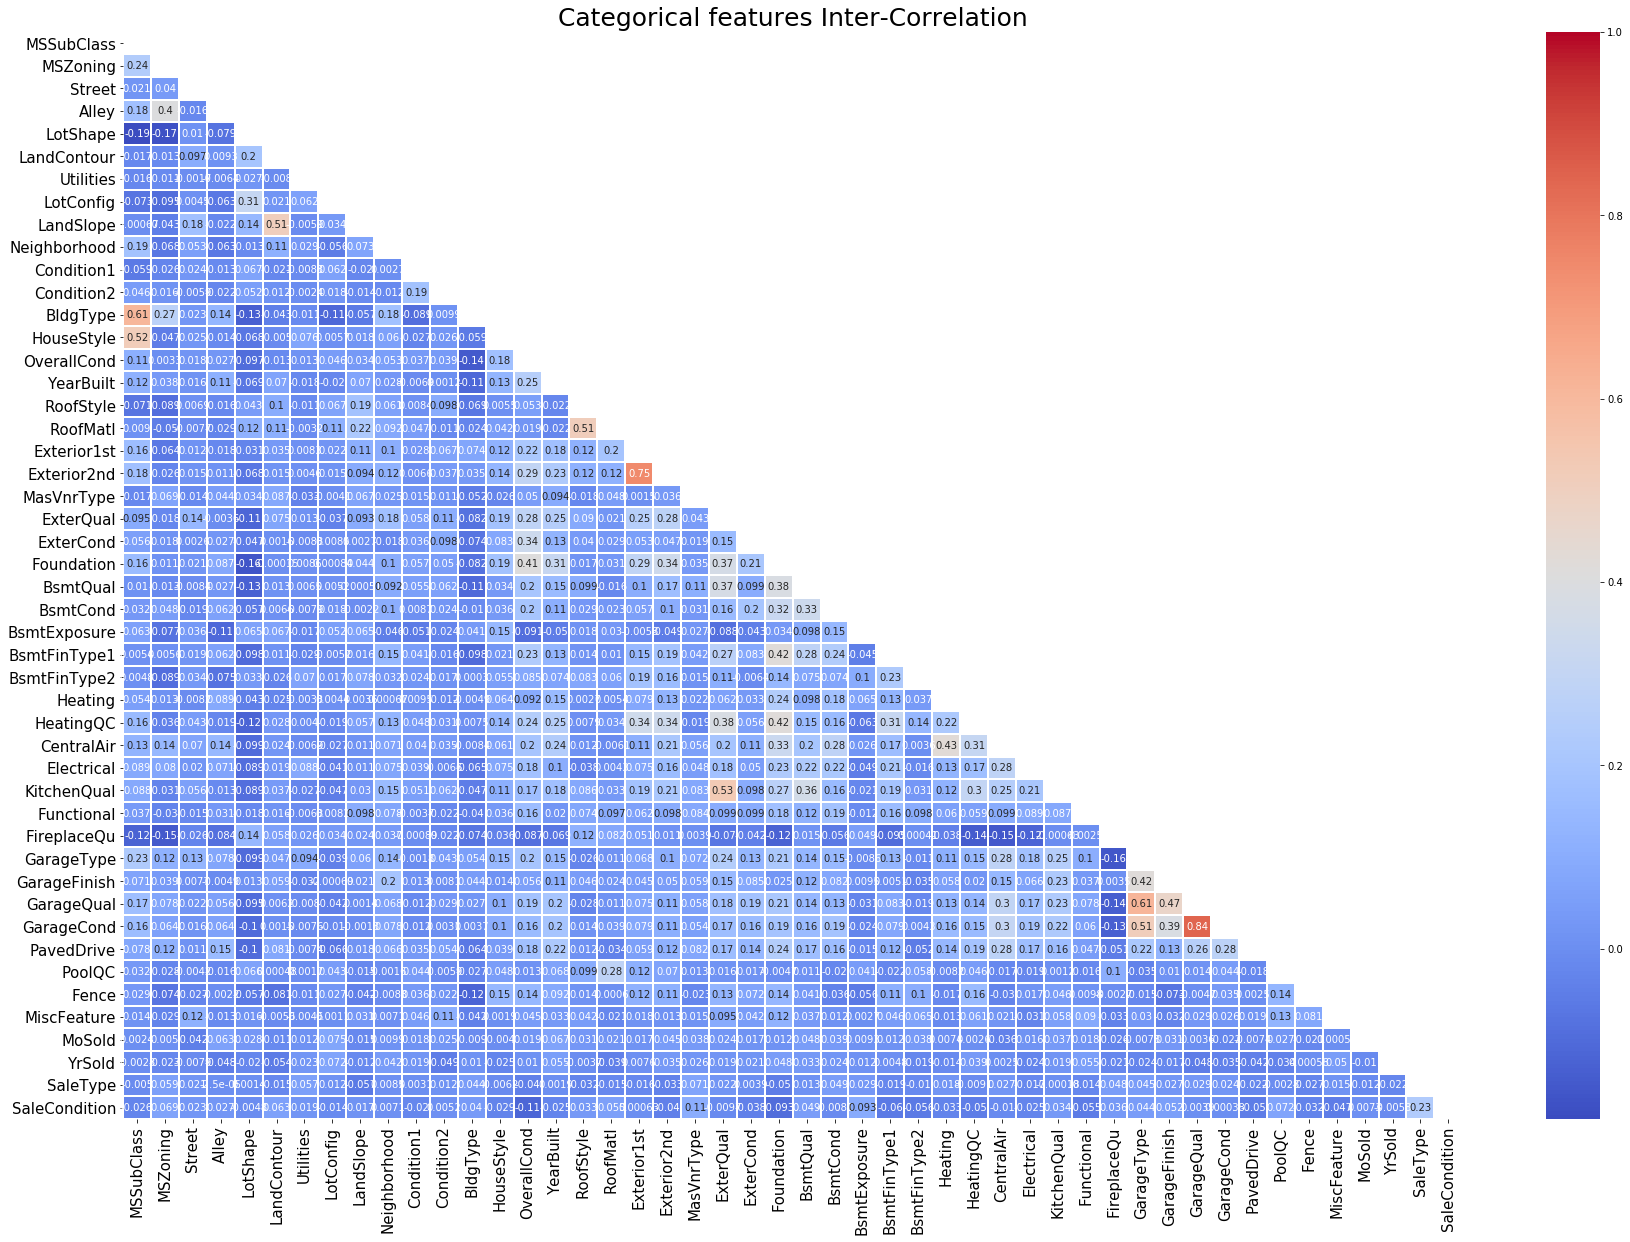

In [52]:
fig, ax = plt.subplots(figsize=(30,20)) 
mask = np.zeros(category_train.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(category_train.corr(),annot=True, linewidths=1, mask= mask ,cmap= 'coolwarm')
plt.title('Categorical features Inter-Correlation', fontsize=25)
_ = plt.xticks(fontsize=15)
_ = plt.yticks(fontsize=15)


## Making new features from Highly correlated features

In [53]:
category_train['External']=category_train['Exterior2nd']-category_train['Exterior1st']
category_test['External']=category_test['Exterior2nd']-category_test['Exterior1st']


## Choosing Numeric Features Using Greedy Elimination

Text(0.5, 1.0, 'Selected Numeric Feature correlation ')

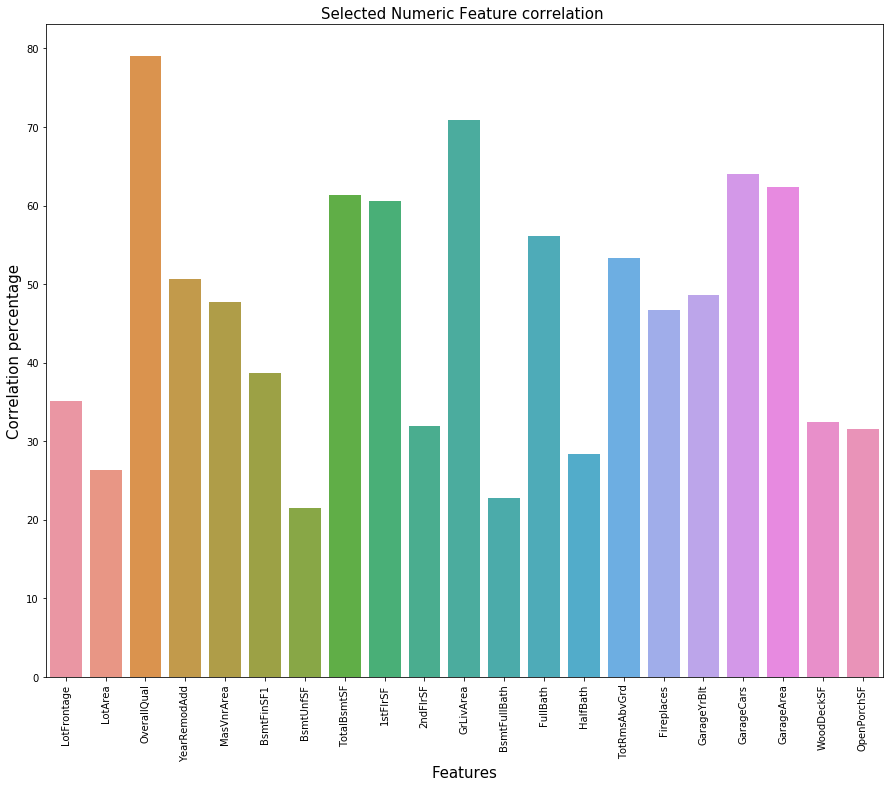

In [54]:
df_num = pd.DataFrame(train_data[numeric_features])
cor = df_num.corr()
cor_target = abs(cor["SalePrice"])
relevant_numeric_features = cor_target[cor_target>0.2]*100
relevant_numeric_features.drop('SalePrice',inplace=True)
df_numeric = pd.DataFrame({'Corr with SalePrice' :relevant_numeric_features})
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=df_numeric.index, y=relevant_numeric_features)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation percentage', fontsize=15)
plt.title('Selected Numeric Feature correlation ', fontsize=15)


In [528]:
numerical_train =  pd.DataFrame(train_data[relevant_numeric_features.index.astype(list)])
numerical_test = pd.DataFrame(test_data[relevant_numeric_features.index.astype(list)])


## Additional Numeric Feature

In [529]:
numerical_train['TotalSF'] = numerical_train['TotalBsmtSF'] + numerical_train['1stFlrSF'] + numerical_train['2ndFlrSF']
numerical_test['TotalSF'] = numerical_test['TotalBsmtSF'] + numerical_test['1stFlrSF'] +numerical_test['2ndFlrSF']

In [530]:
x_train= pd.concat([numerical_train,category_train],axis=1)
x_test= pd.concat([numerical_test,category_test],axis=1)

## Imputing Missing Values to Numeric Data

Imputing with Zeros as missing values in numeric data means absense of given quantity or that quanity being numerically 0

In [531]:
x_train.fillna(0,inplace = True)
x_test.fillna(0, inplace = True)


# Model Selection and CrossValidation

### Model instances 

In [350]:
model_1 = rf()                       #Random Forest
model_2 = gb()                       #Gradient Boosting by sklearn
model_3 = dt()                       #Decision Trees
model_4= xg()                        #XgBoost
model_5= lgb.LGBMRegressor()         #Light Gradient boosting 
model_6= et()                        #Extra Trees
model_7= ad()                        #AdaBoost 
model_8 = cat(silent= True)          #CatBoost
models= [model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8]       
score_1,score_2,score_3,score_4,score_5,score_6,score_7 , score_8 = [] , [] , [], [], [], [], [] , []
score= [score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8]

In [351]:
from statistics import mean

### Train-Test Split and Evaluation 

In [354]:
n_folds =10
kf=KFold(n_folds)  #K-fold cross validation strategy
df_pred = pd.DataFrame(index=range(0,int(x_test.shape[0]/n_folds+1)), columns=range(0,8))
df_rmse = pd.DataFrame(index=range(0,int(x_test.shape[0]/n_folds+1)), columns=range(0,8))
for i in range(0,8):
    for train_index,test_index in kf.split(x_train):
        X_train, X_test = x_train.iloc[train_index],x_train.iloc[test_index]
        Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
        models[i].fit(X_train,Y_train)
        df_pred.iloc[:,i]= models[i].predict(X_test)
        df_rmse.iloc[:,i]= np.sqrt(mean_squared_error(Y_test,df_pred.iloc[:,i]))
        

Text(0, 0.5, 'RMSE')

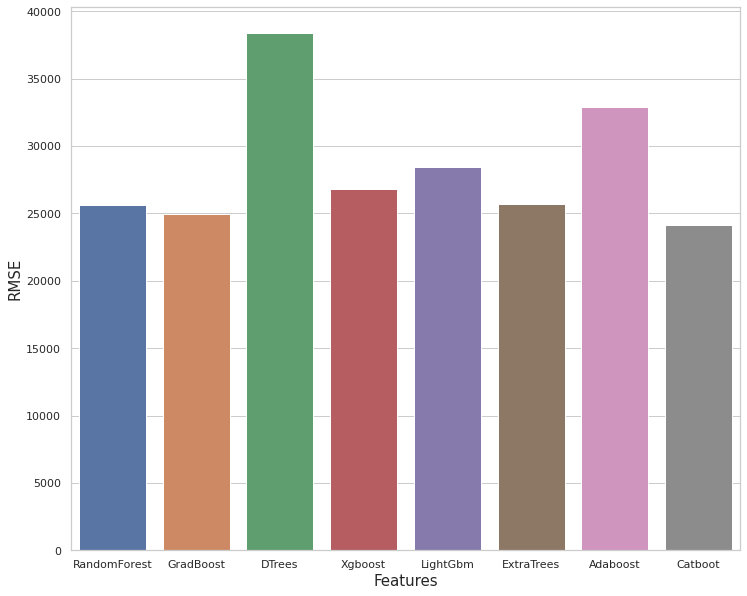

In [588]:
df_rmse.columns = ['RandomForest', 'GradBoost', 'DTrees','Xgboost','LightGbm','ExtraTrees',"Adaboost",'Catboot']
f, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x=df_rmse.columns, y=df_rmse.mean())
plt.xlabel('Features', fontsize=15)
plt.ylabel('RMSE', fontsize=15)


In [ ]:
Feature Importances 

# Feature Importances

In [573]:
def plot_func(model,name):
    sns.set(style='whitegrid')
    f, ax = plt.subplots(figsize=(8, 8))
    feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
    s = feat_importances.nlargest(5)
    sns.barplot(s.index,s, palette='YlGnBu')
    plt.title('{}'.format(name))


#### Random Forest

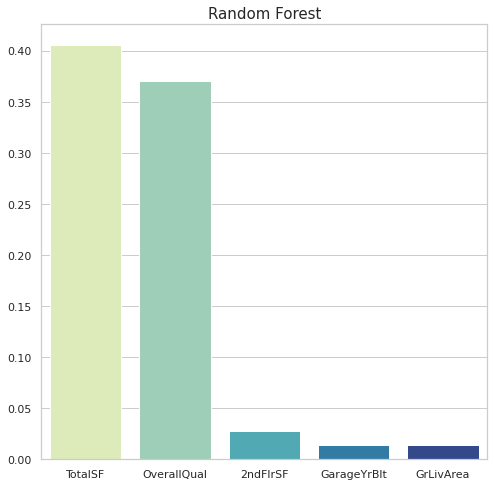

In [574]:
model_1.fit(x_train,y_train)
plot_func(model_1,'Random Forest')

#### GradientBoost

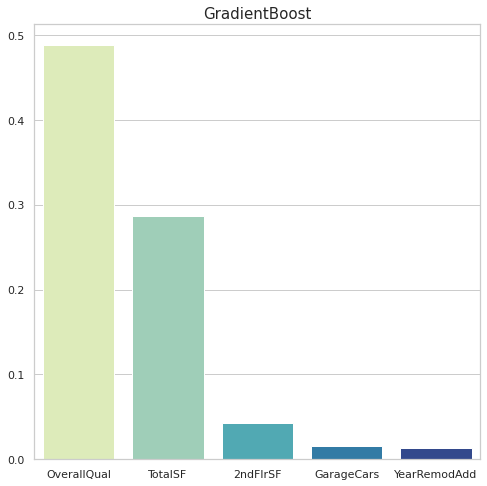

In [575]:
model_3.fit(x_train,y_train)
plot_func(model_3,'GradientBoost')

#### Xgboost

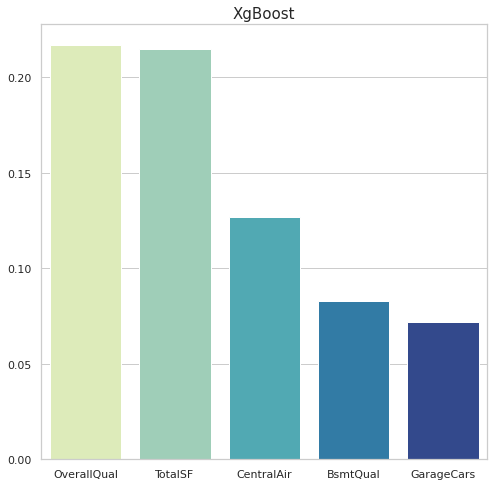

In [576]:
model_4.fit(x_train,y_train)
plot_func(model_4,'XgBoost')

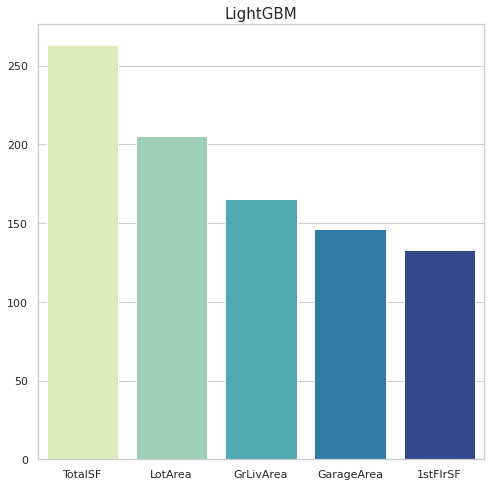

In [592]:
model_5.fit(x_train,y_train)
plot_func(model_5,'LightGBM')

#### Catboost 

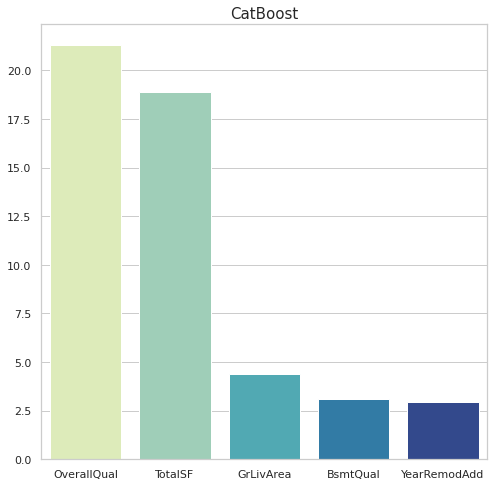

In [593]:
model_8.fit(x_train,y_train)
plot_func(model_8,'CatBoost')

It can be noted from above graphs that Xgboost, LightGbm and Catboost depends on various features rather than depending on one or two features like RandomForest or Gradient boosting, thus they can be useful to prevent overfitting and get better test results

### Hyperparameter Tuning 

In [597]:
from sklearn.model_selection import RandomizedSearchCV
def hyperparameter_tuning(model,parameters,iter_numb,x_train,y_train,):
    pe_error= make_scorer('mean_squared_error')
    random_search= RandomizedSearchCV(model,parameters,n_jobs=-1,cv=10,n_iter=iter_numb ,scoring = pe_error)
    random_search.fit(x_train,y_train)
    params= random_search.best_params_
    score= random_search.best_score_
    return params,score 

### Setting range for Random search

In [598]:
from scipy.stats import randint 
params_lgbm= { 
                 'boosting_type': ['gbdt', 'goss', 'dart'],
                 'num_leaves': list(range(20, 150)),
                 'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
                 'subsample_for_bin': list(range(20000, 300000, 20000)),
                 'min_child_samples': list(range(20, 500, 5)),
                 'reg_alpha': list(np.linspace(0, 1)),
                 'reg_lambda': list(np.linspace(0, 1)),
                 'colsample_bytree': list(np.linspace(0.6, 1, 10)),
                 'subsample': list(np.linspace(0.5, 1, 100)),
                 'is_unbalance': [True, False]  }

params_gb= {    
                'alpha' : list(np.linspace(0, 1)), 
                'ccp_alpha': list(np.linspace(0, 1)) ,
                'learning_rate' : list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)), 
                'max_depth' : list(range(1,5)),
                'min_samples_leaf' : list(range(1,10)), 
                'min_samples_split' : [2,3,4],
                'n_estimators' : list(range(100,1000,100))
               }


In [ ]:
#params,score= hyperparameter_tuning(model_5,params_lgbm,50,x_train,y_train)

### Setting gradient boost parameters

In [599]:
cross_val= gb( 
            n_estimators = 300,
            min_samples_split= 2,
            min_samples_leaf= 4,
            max_depth= 2,
            learning_rate = 0.148745377360722,
            ccp_alpha =0.5306122448979591,
            alpha = 0.32653061224489793)
# tree_method = 'gpu_hist')              #for Gpu boosting
cross_val.fit(x_train,y_train)
gb_pred= cross_val.predict(x_test)      #gradient boost predictions


In [600]:
params_rf = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
params_et = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
params_ada = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}
params_gb= {
    'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 2,
 'learning_rate': 0.148745377360722,
 'ccp_alpha': 0.5306122448979591,
 'alpha': 0.32653061224489793
}

## Convex mixing ensembling 

Combining the best performing models(chosen based on diverse feature importances and least training error) and taking weighted averages 

In [601]:
#---------LGBM--------------
a = lgb.LGBMRegressor().fit(x_train,y_train)        
lgb_predict = a.predict(x_test)

#-------GradBoost-----------
cross_val.fit(x_train,y_train)
gb_pred= cross_val.predict(x_test)
#-------CatBoost------------
b = cat(silent= True).fit(x_train,y_train)
cat_predict = b.predict(x_test)
#--------Xgboost------------
c= xg().fit(x_train,y_train)
xg_predict= c.predict(x_test)
#-------Final Merge---------
predictions = .2*gb_pred  + .1*cat_predict + .2*lgb_predict +.5*xg_predict


Hyperparameters in the last equations are guessed based on performance on test set due to lack of computational resources

# Conclusions

- Test accuracy was found to be 86 percent
- The model currently overfits a little and needs regularization 


## Future Scope 

- More sophisicated ensembeling/stacking methods can be applied
- Conventional regression algorithms like Lasso, Linear, Logistic regression can be tested after scaling and normalizing dataset.
- Hyperparameter tuning for all algorithms can be performed given enough computational resources